In [ ]:
# Load the data from gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/project/data.zip" -d "/content"

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator
# Imports for testing pretrained models
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input as ppi_resnet
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as ppi_vgg
# Import metrics
from sklearn.metrics import classification_report, confusion_matrix
# Import plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


import os

In [ ]:
# Training pipeline with validation for parameter tuning

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_generator = train_datagen.flow_from_directory(
    'data/train', # same directory as training data
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 2501 images belonging to 15 classes.
Found 616 images belonging to 15 classes.


In [ ]:
# Training pipeline for training final model 
train_complete = ImageDataGenerator(rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,      
    rotation_range=30,                 
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,)

train_complete = train_complete.flow_from_directory(
    'data/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

Found 3117 images belonging to 15 classes.


In [ ]:
num_classes = 15
input_shape = (224, 224, 3)


model = keras.Sequential()

model.add(Dense(32, (3, 3, 3), input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# hidden layer    
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
# Compilation - loss is categorical crossentropy, which is standard for multiclass classification
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
# For training with validation set (parameter tuning)

# model.fit(train_generator,
#           validation_data=val_generator,
#           verbose=1,
#           epochs=25)

# For training on complete dataset
model.fit(train_complete,
          verbose=1,
          epochs=25)

Epoch 1/25
98/98 [==============================] - 45s 353ms/step - loss: 2.6285 - accuracy: 0.1328
Epoch 2/25
98/98 [==============================] - 34s 343ms/step - loss: 2.1635 - accuracy: 0.2913
Epoch 3/25
98/98 [==============================] - 34s 351ms/step - loss: 1.9363 - accuracy: 0.3677
Epoch 4/25
98/98 [==============================] - 35s 357ms/step - loss: 1.7672 - accuracy: 0.4267
Epoch 5/25
98/98 [==============================] - 33s 342ms/step - loss: 1.6725 - accuracy: 0.4700
Epoch 6/25
98/98 [==============================] - 35s 358ms/step - loss: 1.5231 - accuracy: 0.5133
Epoch 7/25
98/98 [==============================] - 34s 342ms/step - loss: 1.5163 - accuracy: 0.5236
Epoch 8/25
98/98 [==============================] - 35s 358ms/step - loss: 1.4032 - accuracy: 0.5605
Epoch 9/25
98/98 [==============================] - 34s 345ms/step - loss: 1.3689 - accuracy: 0.5688
Epoch 10/25
98/98 [==============================] - 34s 343ms/step - loss: 1.3127 - accura

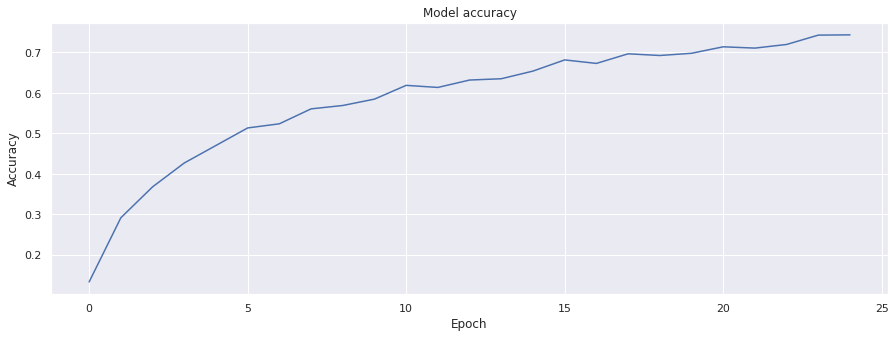

In [ ]:
# Plot the learning curve (accuracy)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['val_accuracy']) # Trained on whole dataset - no validation set
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Create the testing data (rescale and target size must match training data)
test_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_gen.flow_from_directory('data/valid', target_size=(224, 224), class_mode='categorical', shuffle=False)
predictions = model.predict(test_gen)
y_true = test_gen.labels
y_pred = np.array([np.argmax(predictions[i]) for i in range(predictions.shape[0])])

Found 75 images belonging to 15 classes.


In [ ]:
# Print the confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 3 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 3 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]


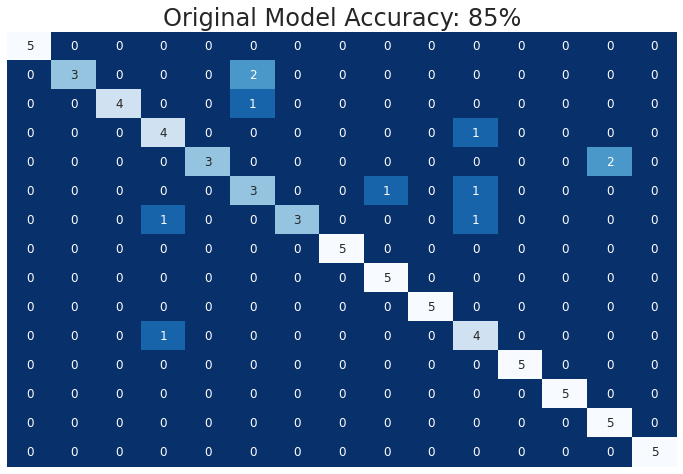

In [ ]:
# Plot a visualization of the confusion matrix
sns.set(rc={'figure.figsize':(12,8), 'figure.frameon':True})
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues_r', cbar=False, xticklabels=False, yticklabels=False)
plt.title("Original Model Accuracy: 85%", size=24)
plt.show()

In [19]:
# Save model to my drive
model.save('drive/MyDrive/project/model.h5')

In [ ]:
# Reload model
model = tf.keras.models.load_model('drive/MyDrive/project/model.h5')

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
holdout = test_gen.flow_from_directory('data/test', target_size=(224, 224), class_mode='categorical', shuffle=False)
predictions = model.predict(holdout)
y_true = holdout.labels
y_pred = np.array([np.argmax(predictions[i]) for i in range(predictions.shape[0])])

In [ ]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

## Comparison with Transfer Learning Models

In the following section we adapted code from [this](https://www.kaggle.com/code/dj67rockers/animal-classifier-99-validation-accuracy) Kaggle notebook to try tackling this problem with transfer learning. The base models are VGG19 and ResNet-50; they are both pre-trained on the imagenet dataset.

In [ ]:
# Data augmentation 

vgg_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=.2,
    preprocessing_function=ppi_vgg
) 

train_generator_vgg = vgg_datagen.flow_from_directory(
    directory='data/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)
val_generator_vgg = vgg_datagen.flow_from_directory(
    directory='data/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=True,
)


Found 2501 images belonging to 15 classes.
Found 616 images belonging to 15 classes.


In [ ]:
# Test dataset - note, the same preprocessing must be applied

test_gen = ImageDataGenerator(
    preprocessing_function=ppi_vgg
    )
test_gen = test_gen.flow_from_directory('data/valid', target_size=(224, 224), class_mode='categorical', shuffle=False)

Found 75 images belonging to 15 classes.


In [ ]:
# Modelling VGG

vgg19 = VGG19(include_top = False, input_shape = (224,224,3), weights = 'imagenet')
for layer in vgg19.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(vgg19.output)
predictions = Dense(15, activation='softmax')(x)

model_vgg = Model(inputs = vgg19.input, outputs = predictions)
model_vgg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history_vgg = model_vgg.fit(
      train_generator_vgg,
      validation_data=val_generator_vgg,
      epochs=10,
      verbose=2)


Epoch 1/10
79/79 - 48s - loss: 4.6873 - accuracy: 0.3758 - val_loss: 1.3260 - val_accuracy: 0.6981 - 48s/epoch - 605ms/step
Epoch 2/10
79/79 - 46s - loss: 0.6841 - accuracy: 0.8209 - val_loss: 0.7588 - val_accuracy: 0.8295 - 46s/epoch - 588ms/step
Epoch 3/10
79/79 - 47s - loss: 0.4130 - accuracy: 0.8904 - val_loss: 0.5050 - val_accuracy: 0.8880 - 47s/epoch - 600ms/step
Epoch 4/10
79/79 - 49s - loss: 0.2595 - accuracy: 0.9248 - val_loss: 0.4943 - val_accuracy: 0.8831 - 49s/epoch - 622ms/step
Epoch 5/10
79/79 - 48s - loss: 0.2154 - accuracy: 0.9420 - val_loss: 0.4041 - val_accuracy: 0.9123 - 48s/epoch - 604ms/step
Epoch 6/10
79/79 - 49s - loss: 0.1658 - accuracy: 0.9516 - val_loss: 0.3395 - val_accuracy: 0.9123 - 49s/epoch - 621ms/step
Epoch 7/10
79/79 - 48s - loss: 0.1163 - accuracy: 0.9680 - val_loss: 0.3784 - val_accuracy: 0.9091 - 48s/epoch - 601ms/step
Epoch 8/10
79/79 - 49s - loss: 0.1183 - accuracy: 0.9644 - val_loss: 0.2665 - val_accuracy: 0.9367 - 49s/epoch - 621ms/step
Epoch 9/

In [ ]:
# Evaluation

predictions = model_vgg.predict(test_gen)
y_true = test_gen.labels
y_pred = np.array([np.argmax(predictions[i]) for i in range(predictions.shape[0])])
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8     

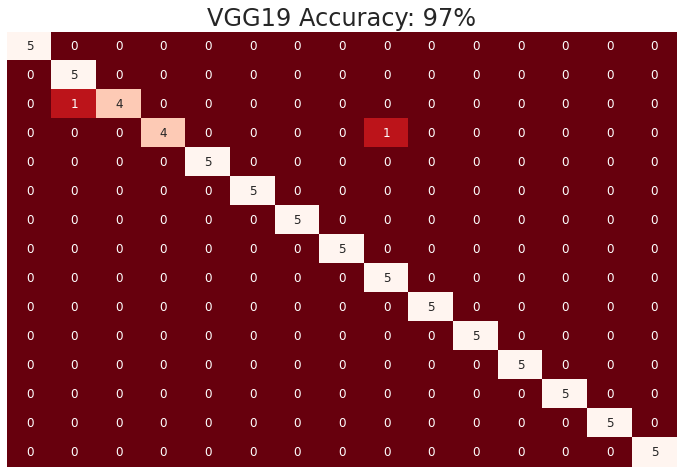

In [ ]:
# Plotting the confusion matrix
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Reds_r', cbar=False, xticklabels=False, yticklabels=False)
plt.title("VGG19 Accuracy: 97%", size=24)
plt.show()

In [ ]:
# ResNet50 data augmentation

resnet50_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=.2,
    preprocessing_function=ppi_resnet
) 

train_generator_resnet50 = resnet50_datagen.flow_from_directory(
    directory='data/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)
val_generator_resnet50 = resnet50_datagen.flow_from_directory(
    directory='data/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=True,
)


Found 2501 images belonging to 15 classes.
Found 616 images belonging to 15 classes.


In [ ]:
# Again - the same preprocessing function must be applied to the test set
test_gen = ImageDataGenerator(
    preprocessing_function=ppi_resnet
    )
test_gen = test_gen.flow_from_directory('data/valid', target_size=(224, 224), class_mode='categorical', shuffle=False)

Found 75 images belonging to 15 classes.


In [ ]:
# Modelling ResNet

resnet50 = ResNet50(include_top = False, input_shape = (224,224,3), weights = 'imagenet')

for layer in resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet50.output)
predictions = Dense(15, activation='softmax')(x)

model_resnet50 = Model(inputs = resnet50.input, outputs = predictions)
model_resnet50.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history_resnet50 = model_resnet50.fit(
      train_generator_resnet50,
      validation_data=val_generator_resnet50,
      epochs=5,
      verbose=2)

Epoch 1/5
79/79 - 55s - loss: 0.8016 - accuracy: 0.8057 - val_loss: 0.2275 - val_accuracy: 0.9610 - 55s/epoch - 697ms/step
Epoch 2/5
79/79 - 46s - loss: 0.1519 - accuracy: 0.9740 - val_loss: 0.1504 - val_accuracy: 0.9724 - 46s/epoch - 584ms/step
Epoch 3/5
79/79 - 48s - loss: 0.0893 - accuracy: 0.9868 - val_loss: 0.1298 - val_accuracy: 0.9724 - 48s/epoch - 608ms/step
Epoch 4/5
79/79 - 56s - loss: 0.0561 - accuracy: 0.9928 - val_loss: 0.1004 - val_accuracy: 0.9789 - 56s/epoch - 714ms/step
Epoch 5/5
79/79 - 58s - loss: 0.0476 - accuracy: 0.9928 - val_loss: 0.0945 - val_accuracy: 0.9756 - 58s/epoch - 733ms/step


In [ ]:
print(len(model_resnet50.non_trainable_weights))
print(len(model_resnet50.trainable_weights))

318
2


In [ ]:
model_resnet50.evaluate(test_gen)

3/3 [==============================] - 0s 69ms/step - loss: 0.0267 - accuracy: 1.0000


[0.026738962158560753, 1.0]

In [ ]:
predictions[5]

array([0.6741297 , 0.00418019, 0.00110465, 0.00573274, 0.00820623,
       0.02937359, 0.00474436, 0.0039556 , 0.00613564, 0.00822356,
       0.00089532, 0.00591588, 0.00251549, 0.23336178, 0.01152515],
      dtype=float32)

In [ ]:
predictions = model_resnet50.predict(test_gen)
y_true = test_gen.labels
y_pred = np.array([np.argmax(predictions[i]) for i in range(predictions.shape[0])])
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8     

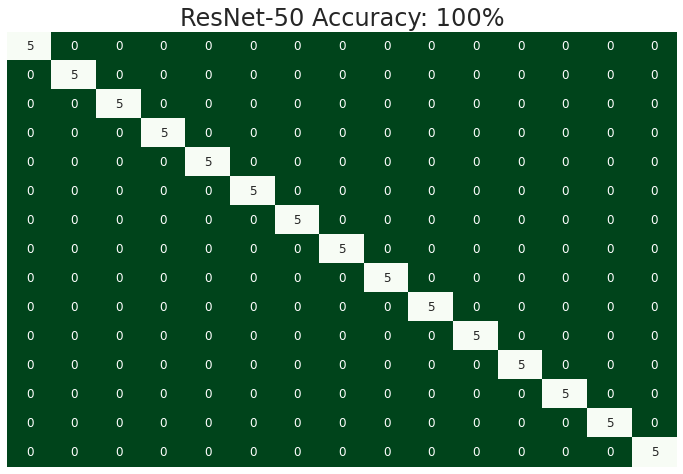

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Greens_r', cbar=False, xticklabels=False, yticklabels=False)
plt.title("ResNet-50 Accuracy: 100%", size=24)
plt.show()